In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-score-classification/train.csv
/kaggle/input/credit-score-classification/test.csv


## 01: Import Library

In [2]:
# import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 02: Import Dataset

In [3]:
data = pd.read_csv('/kaggle/input/credit-score-classification/train.csv')
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## 03: Data Understanding & Brief EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
data.shape

(100000, 28)

In [6]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


## 04: Data Cleaning

In [7]:
# Check Duplicated Data
data.duplicated().any()

False

In [8]:
# Function to Check Missing Value
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['columns', 'Num of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['columns', 'Percentage of Miss']
    miss = miss1.merge(miss2, how='inner', on='columns')
    return miss[miss['Num of Miss']!=0]

In [9]:
missing_data(data)

,columns,Num of Miss,Percentage of Miss
3,Name,9985,9.985
8,Monthly_Inhand_Salary,15002,15.002
13,Type_of_Loan,11408,11.408
15,Num_of_Delayed_Payment,7002,7.002
17,Num_Credit_Inquiries,1965,1.965
21,Credit_History_Age,9030,9.030
24,Amount_invested_monthly,4479,4.479
26,Monthly_Balance,1200,1.200


In [10]:
# Drop Unimportant Columns
data1 = data.drop(columns=['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary',
                           'Type_of_Loan','Num_of_Delayed_Payment','Credit_History_Age','Amount_invested_monthly'])

In [11]:
missing_data(data1)

,columns,Num of Miss,Percentage of Miss
9,Num_Credit_Inquiries,1965,1.965
16,Monthly_Balance,1200,1.200


In [12]:
data1.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,4,3,4,3,11.27,4.0,_,809.98,26.822620,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,3,4,3,4,-1,11.27,4.0,Good,809.98,31.944960,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,4,3,4,3,_,4.0,Good,809.98,28.609352,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,3,4,3,4,5,6.27,4.0,Good,809.98,31.377862,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,3,4,3,4,6,11.27,4.0,Good,809.98,24.797347,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Num_Bank_Accounts         100000 non-null  int64  
 4   Num_Credit_Card           100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Delay_from_due_date       100000 non-null  int64  
 8   Changed_Credit_Limit      100000 non-null  object 
 9   Num_Credit_Inquiries      98035 non-null   float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  object 
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Payment_of_Min_Amount     100000 non-null  ob

In [14]:
# Deleting (-) and (_) in Column
data1['Age'] = data1['Age'].str.replace('-','')
data1['Age'] = data1['Age'].str.replace('_','')

# Deleting (-) and (_) in Column
data1['Annual_Income'] = data1['Annual_Income'].str.replace('-','')
data1['Annual_Income'] = data1['Annual_Income'].str.replace('_','')

# Deleting (-) and (_) in Column
data1['Num_of_Loan'] = data1['Num_of_Loan'].str.replace('-','')
data1['Num_of_Loan'] = data1['Num_of_Loan'].str.replace('_','')

# Deleting (-) and (_) in Column
data1['Changed_Credit_Limit'] = data1['Changed_Credit_Limit'].str.replace('-','0')
data1['Changed_Credit_Limit'] = data1['Changed_Credit_Limit'].str.replace('_','0')

# Deleting (-) and (_) in Column
data1['Outstanding_Debt'] = data1['Outstanding_Debt'].str.replace('-','')
data1['Outstanding_Debt'] = data1['Outstanding_Debt'].str.replace('_','')

# Deleting (-) and (_) in Column
data1['Monthly_Balance'] = data1['Monthly_Balance'].str.replace('-','')
data1['Monthly_Balance'] = data1['Monthly_Balance'].str.replace('_','')

# Replacing (!@9#%8) to (Unknown) in Column
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('!@9#%8','Unknown')

In [15]:
data1['Age'] = data1['Age'].astype(int)
data1['Annual_Income'] = data1['Annual_Income'].astype(float)
data1['Num_of_Loan'] = data1['Num_of_Loan'].astype(int)
data1['Changed_Credit_Limit'] = data1['Changed_Credit_Limit'].astype(float)
data1['Outstanding_Debt'] = data1['Outstanding_Debt'].astype(float)
data1['Monthly_Balance'] = data1['Monthly_Balance'].astype(float)

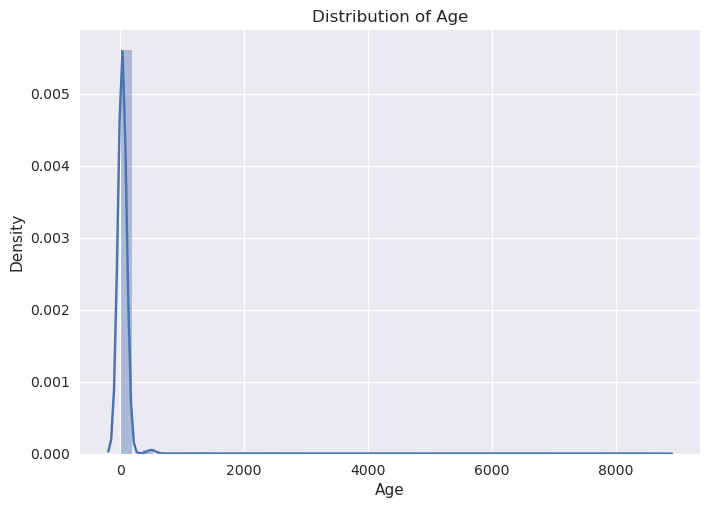

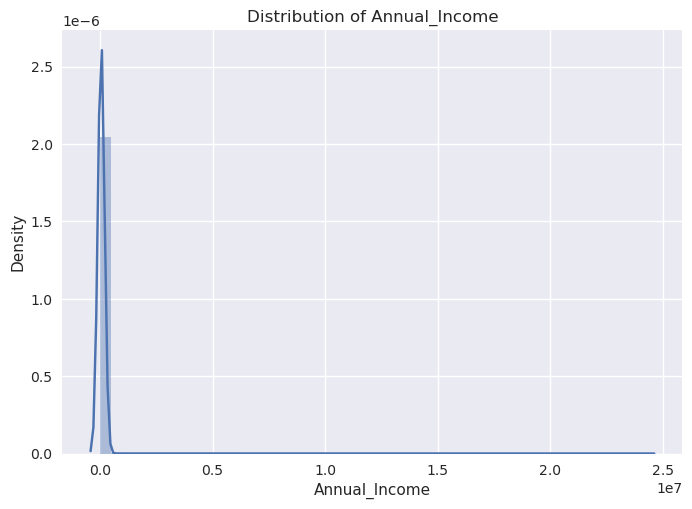

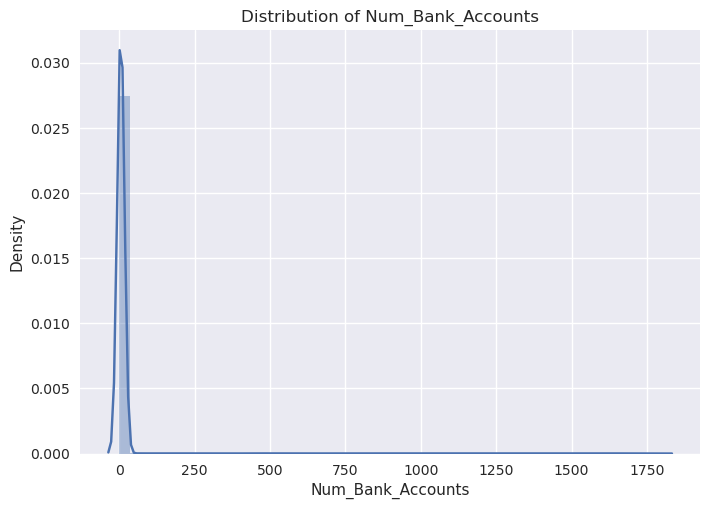

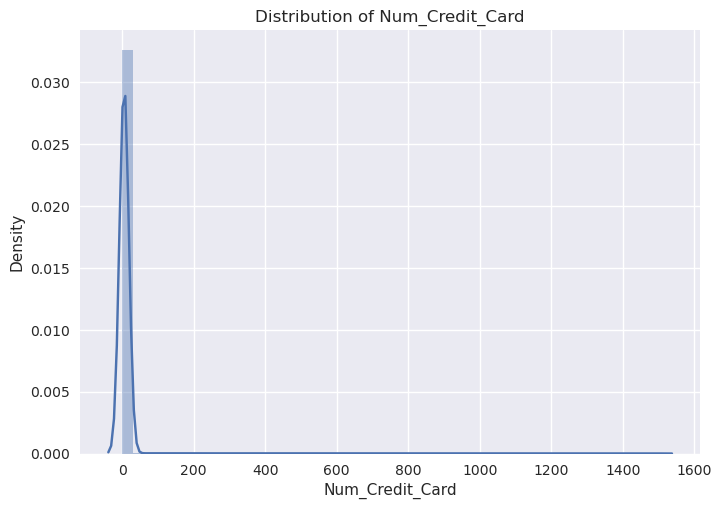

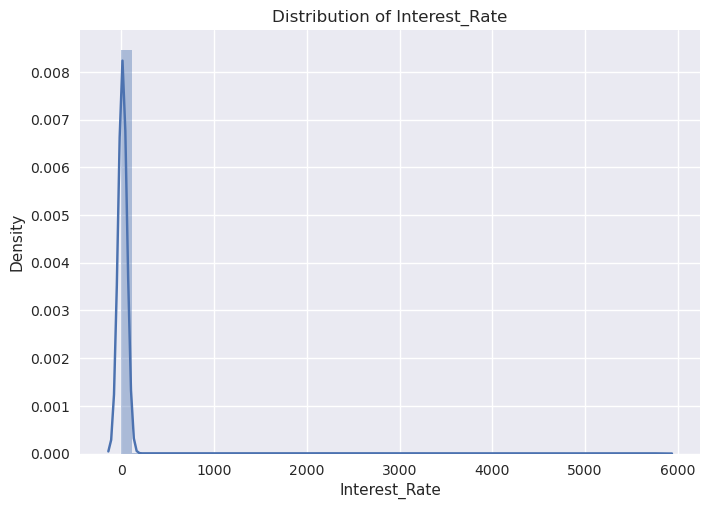

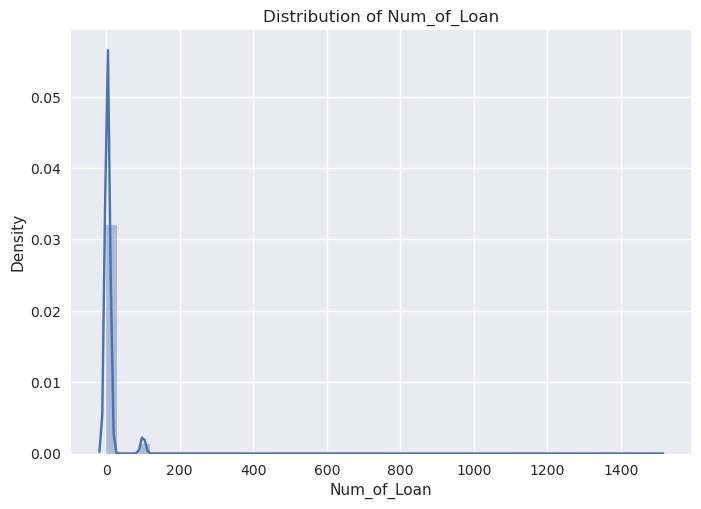

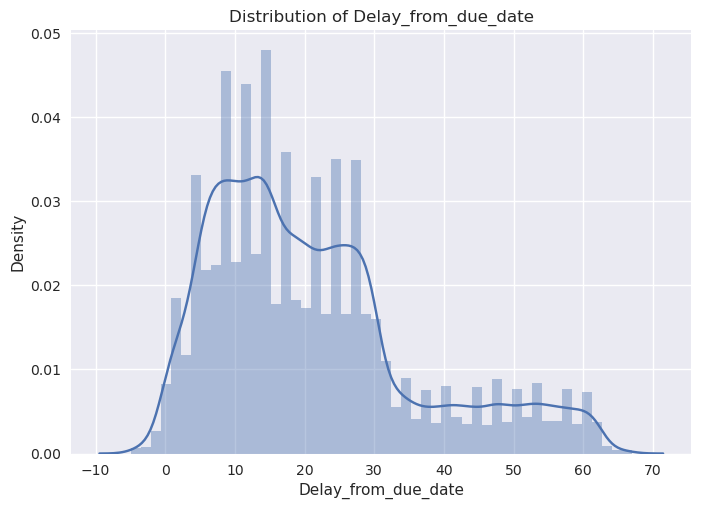

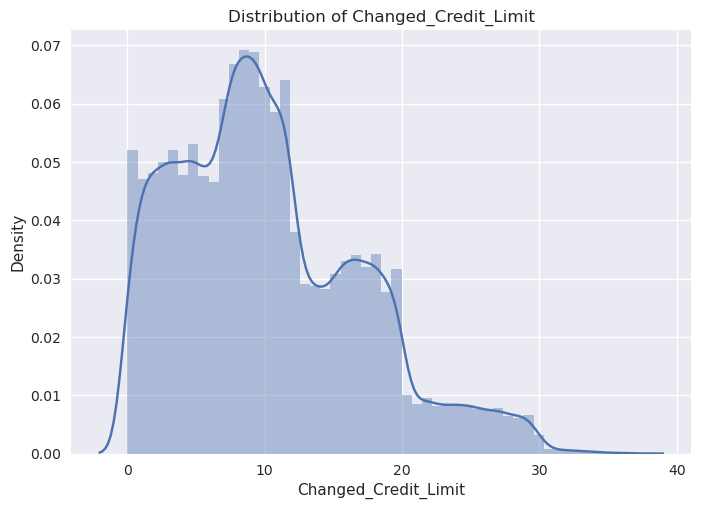

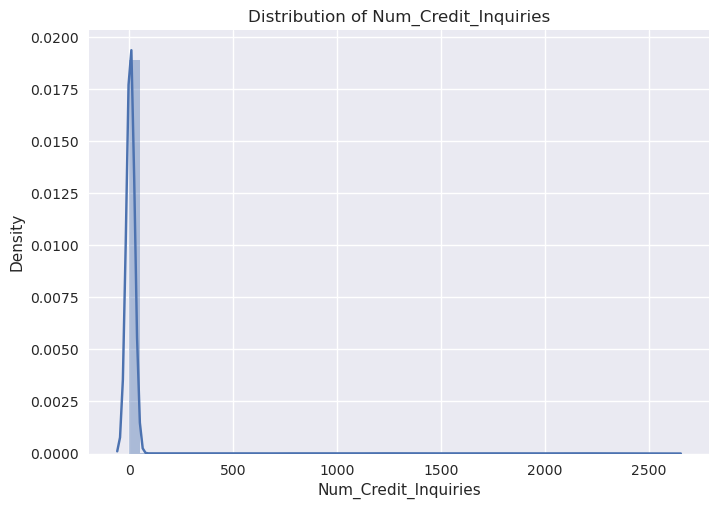

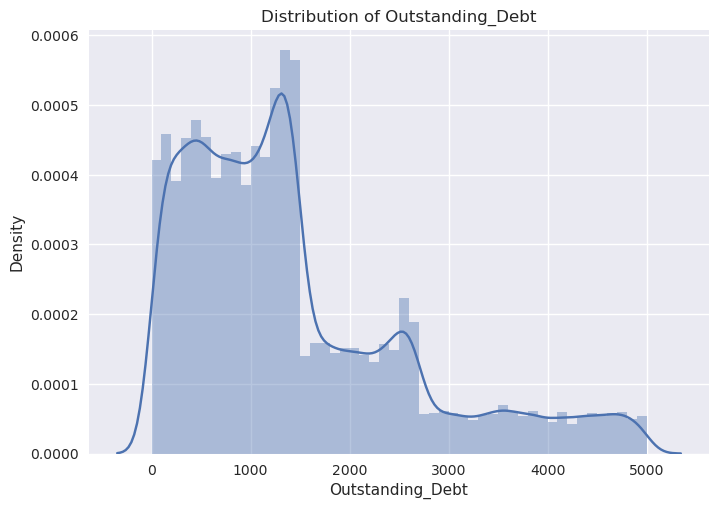

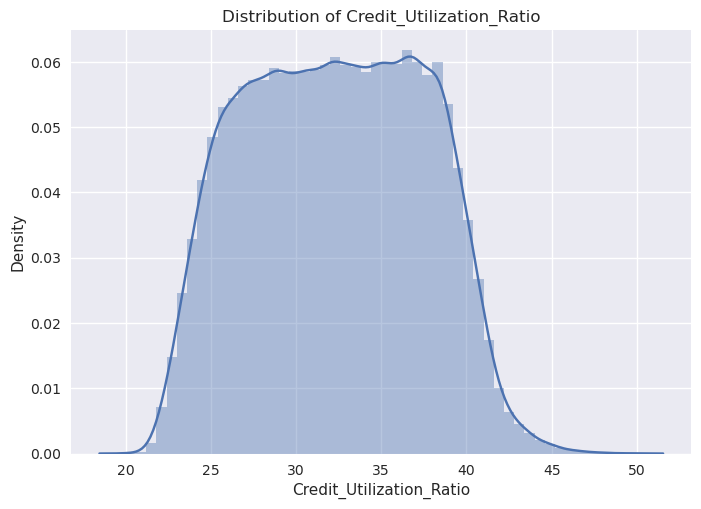

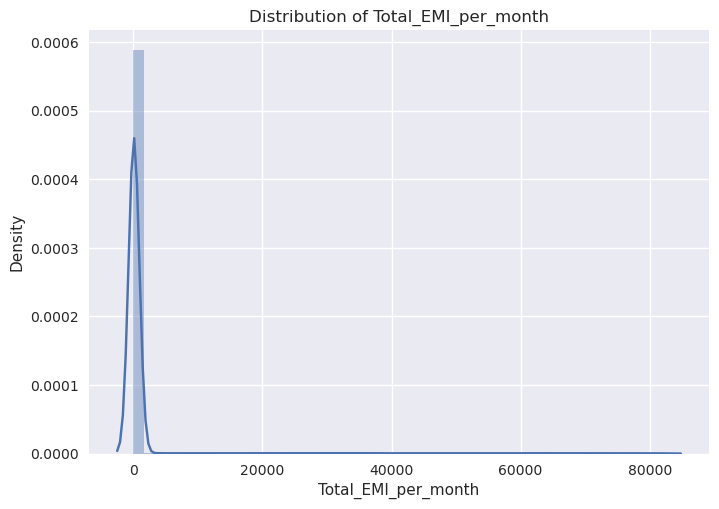

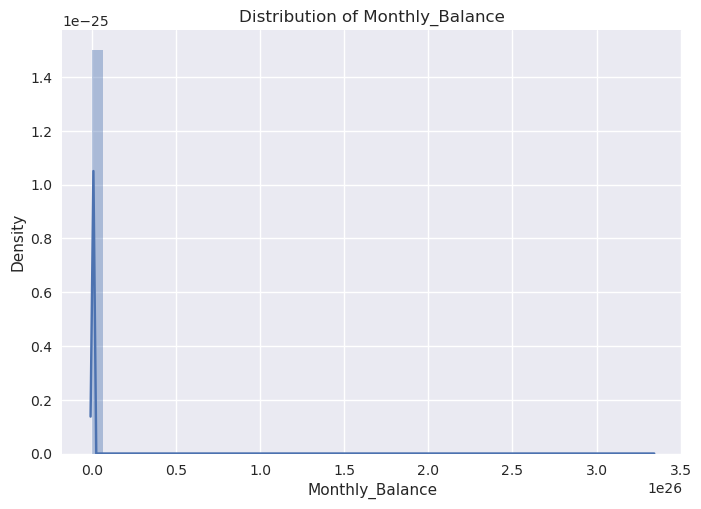

In [16]:
numfeat = data1[['Age', 'Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
           'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries','Outstanding_Debt', 
           'Credit_Utilization_Ratio','Total_EMI_per_month', 'Monthly_Balance']]

for i in numfeat.columns:
    sns.distplot(numfeat[i])
    plt.title(f'Distribution of {i}')
    plt.show()

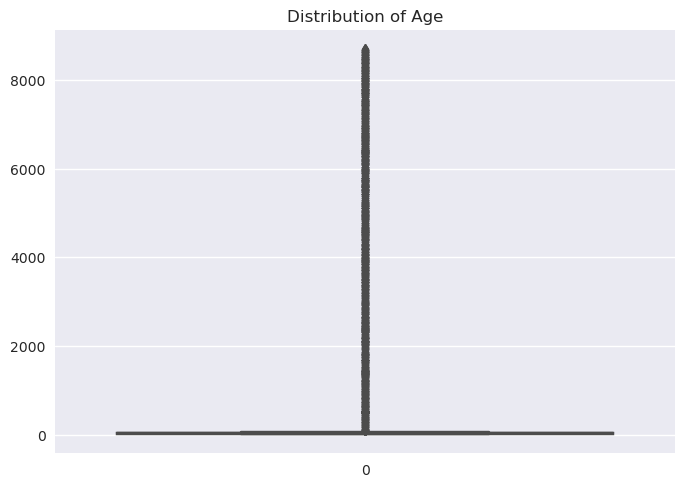

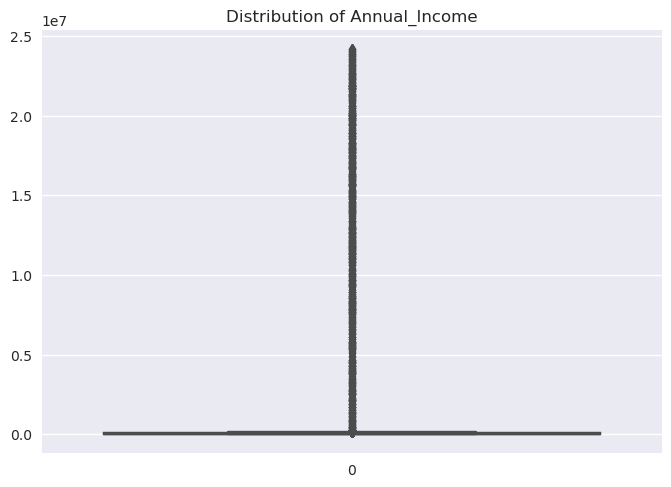

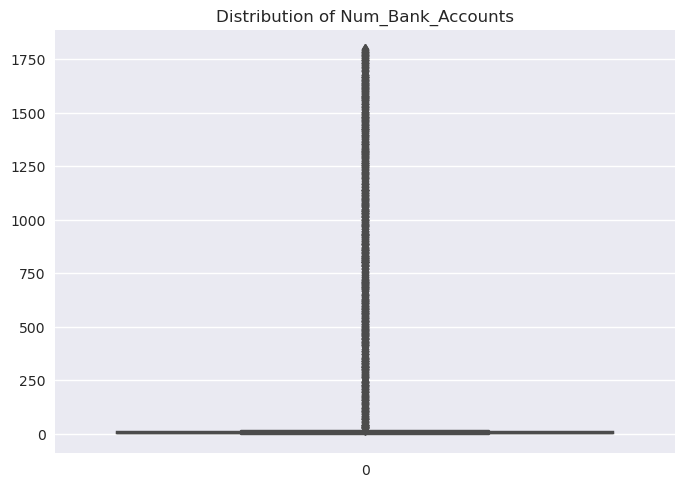

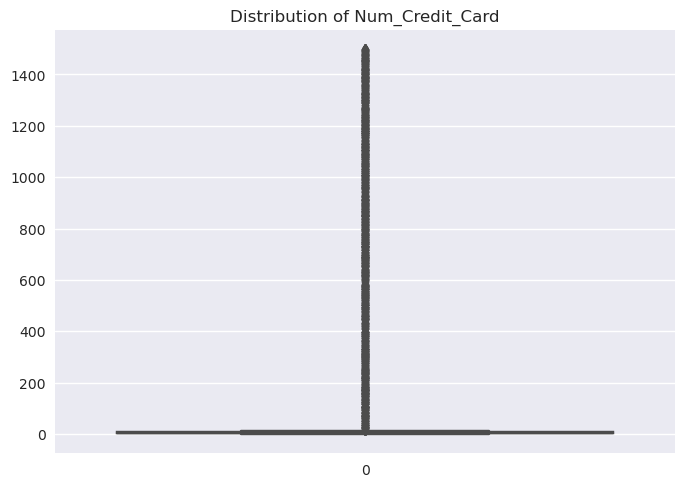

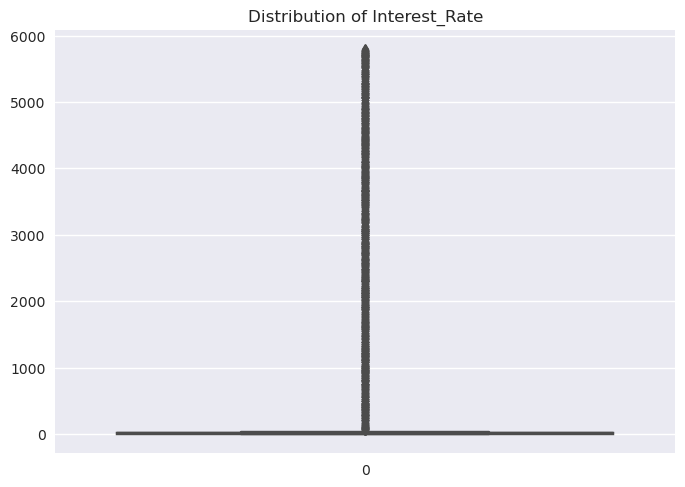

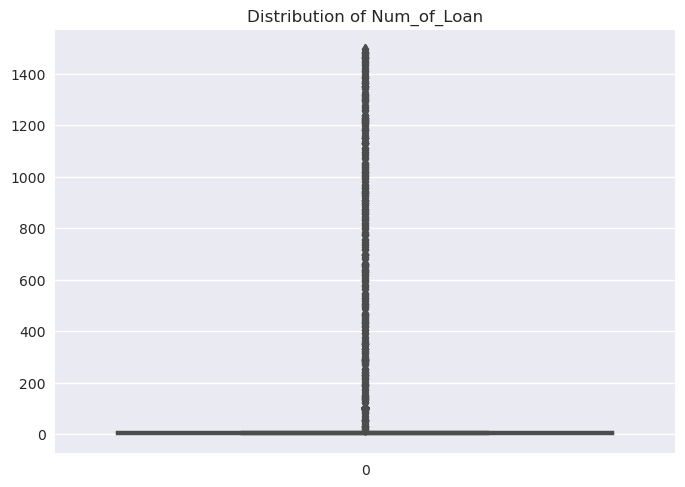

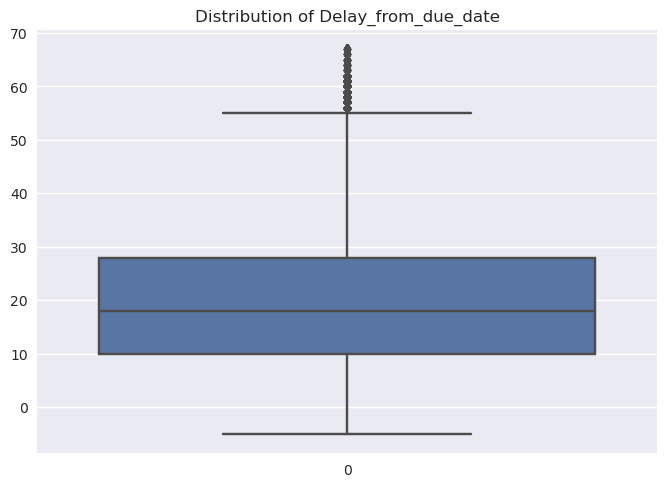

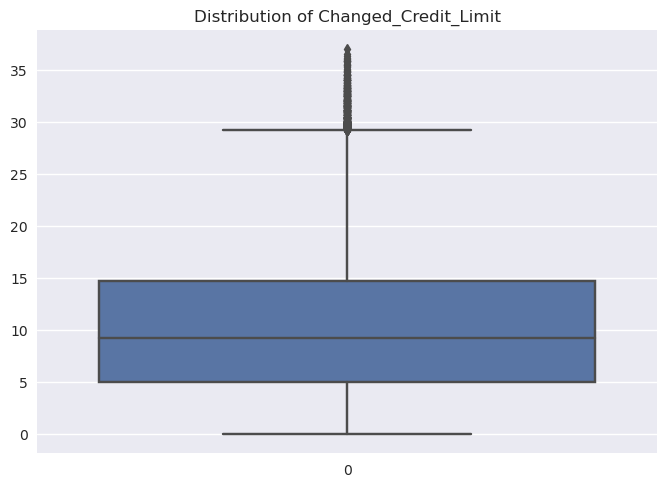

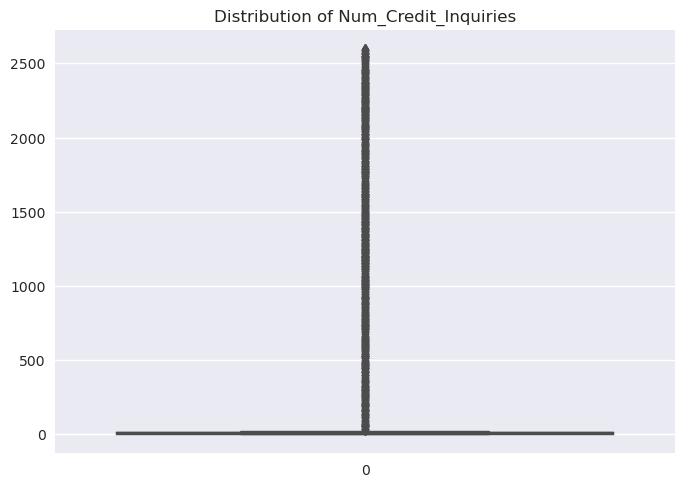

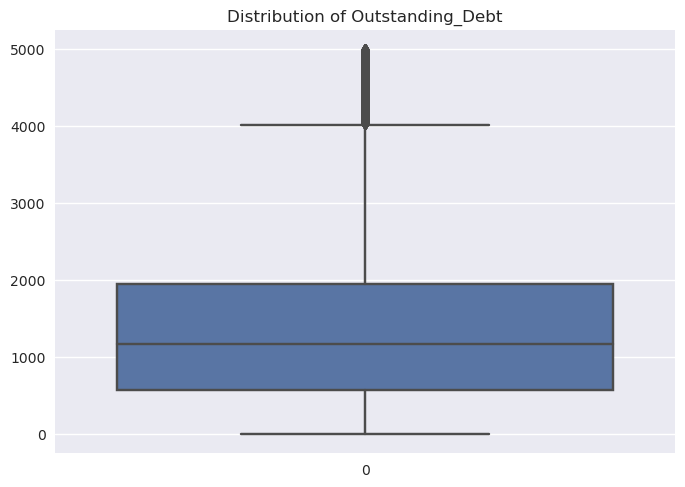

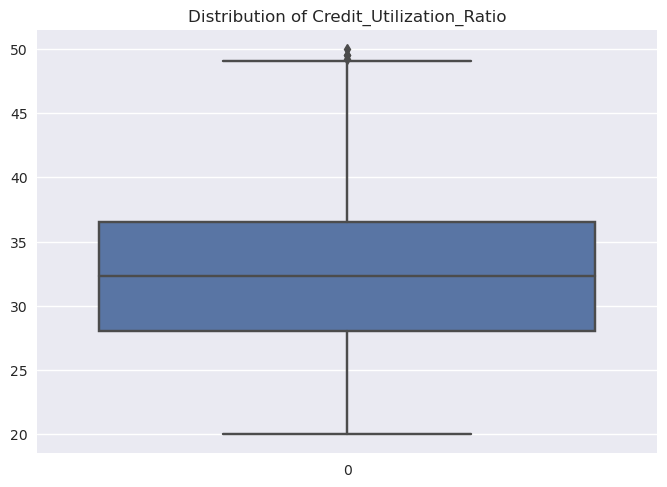

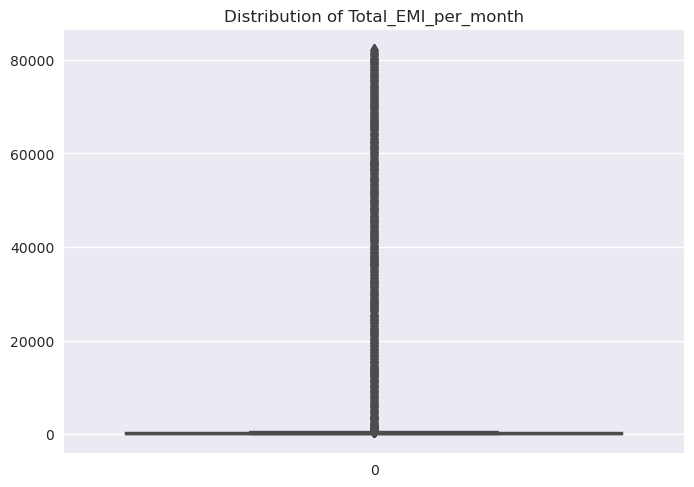

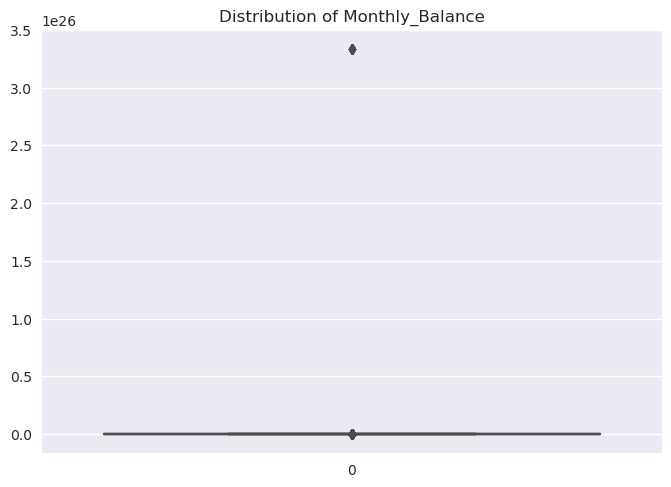

In [17]:
for i in numfeat.columns:
    sns.boxplot(numfeat[i])
    plt.title(f'Distribution of {i}')
    plt.show()

In [18]:
# Replacing outlier of Age with Ffill
data1['Age'].where((data1['Age']<=80),np.nan, inplace=True)
data1['Age'] = data1['Age'].fillna(method='ffill')
data1

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,4,3,4,3,11.27,4.0,_,809.98,26.822620,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3,4,3,4,-1,11.27,4.0,Good,809.98,31.944960,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,3,4,3,4,3,0.00,4.0,Good,809.98,28.609352,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,3,4,3,4,5,6.27,4.0,Good,809.98,31.377862,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,3,4,3,4,6,11.27,4.0,Good,809.98,24.797347,No,49.574949,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,4,6,7,2,23,11.50,3.0,_,502.38,34.663572,No,35.104023,High_spent_Large_value_payments,NaN,Poor
99996,25.0,Mechanic,39628.99,4,6,7,2,18,11.50,3.0,_,502.38,40.565631,No,35.104023,High_spent_Medium_value_payments,NaN,Poor
99997,25.0,Mechanic,39628.99,4,6,5729,2,27,11.50,3.0,Good,502.38,41.255522,No,35.104023,High_spent_Large_value_payments,NaN,Poor
99998,25.0,Mechanic,39628.99,4,6,7,2,20,11.50,3.0,Good,502.38,33.638208,No,35.104023,Low_spent_Large_value_payments,NaN,Standard


In [19]:
# Handling missing values with mean
data1['Monthly_Balance'] = data1['Monthly_Balance'].fillna(data1['Monthly_Balance'].mean())
data1['Num_Credit_Inquiries'] = data1['Num_Credit_Inquiries'].fillna(data1['Num_Credit_Inquiries'].mean())

# Handling missing values with ffill
data1['Occupation'] = data1['Occupation'].replace('_______', method='ffill')
data1.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,4,3,4,3,11.27,4.0,_,809.98,26.822620,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3,4,3,4,-1,11.27,4.0,Good,809.98,31.944960,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,3,4,3,4,3,0.00,4.0,Good,809.98,28.609352,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,3,4,3,4,5,6.27,4.0,Good,809.98,31.377862,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,3,4,3,4,6,11.27,4.0,Good,809.98,24.797347,No,49.574949,High_spent_Medium_value_payments,341.489231,Good


In [20]:
# Handling missing values with bfill
data1['Credit_Mix'] = data1['Credit_Mix'].replace('_', method='bfill')
data1.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3,4,3,4,3,11.27,4.0,Good,809.98,26.822620,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,3,4,3,4,-1,11.27,4.0,Good,809.98,31.944960,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,3,4,3,4,3,0.00,4.0,Good,809.98,28.609352,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,Scientist,19114.12,3,4,3,4,5,6.27,4.0,Good,809.98,31.377862,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,3,4,3,4,6,11.27,4.0,Good,809.98,24.797347,No,49.574949,High_spent_Medium_value_payments,341.489231,Good


In [21]:
data1.groupby(['Credit_Mix']).count()[['Occupation']]

,Occupation
Credit_Mix,
Bad,23829
Good,30393
Standard,45778


## 05: Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
lE = LabelEncoder()

In [23]:
data1['Credit_Mix'] = data1['Credit_Mix'].str.replace('Bad','0')
data1['Credit_Mix'] = data1['Credit_Mix'].str.replace('Standard','1')
data1['Credit_Mix'] = data1['Credit_Mix'].str.replace('Good','2')
data1['Credit_Mix'] = data1['Credit_Mix'].astype(int)
data1.groupby(['Credit_Mix']).count()[['Occupation']]

,Occupation
Credit_Mix,
0,23829
1,45778
2,30393


In [24]:
data1['Payment_of_Min_Amount'] = lE.fit_transform(data1['Payment_of_Min_Amount'])
data1.groupby(['Payment_of_Min_Amount']).count()[['Occupation']]

,Occupation
Payment_of_Min_Amount,
0,12007
1,35667
2,52326


In [25]:
data1.groupby(['Payment_Behaviour']).count()[['Occupation']]

,Occupation
Payment_Behaviour,
High_spent_Large_value_payments,13721
High_spent_Medium_value_payments,17540
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425
Low_spent_Medium_value_payments,13861
Low_spent_Small_value_payments,25513
Unknown,7600


In [26]:
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('Unknown','0')
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('Low_spent_Small_value_payments','1')
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('Low_spent_Medium_value_payments','2')
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('Low_spent_Large_value_payments','3')
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('High_spent_Small_value_payments','4')
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('High_spent_Medium_value_payments','5')
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].str.replace('High_spent_Large_value_payments','6')
data1['Payment_Behaviour'] = data1['Payment_Behaviour'].astype(int)
data1.groupby(['Payment_Behaviour']).count()[['Occupation']]

,Occupation
Payment_Behaviour,
0,7600
1,25513
2,13861
3,10425
4,11340
5,17540
6,13721


In [27]:
data1.groupby(['Credit_Score']).count()[['Occupation']]

,Occupation
Credit_Score,
Good,17828
Poor,28998
Standard,53174


In [28]:
data1['Credit_Score'] = data1['Credit_Score'].str.replace('Poor','0')
data1['Credit_Score'] = data1['Credit_Score'].str.replace('Standard','1')
data1['Credit_Score'] = data1['Credit_Score'].str.replace('Good','2')
data1['Credit_Score'] = data1['Credit_Score'].astype(int)
data1.groupby(['Credit_Score']).count()[['Occupation']]

,Occupation
Credit_Score,
0,28998
1,53174
2,17828


In [29]:
data1 = pd.get_dummies(data1, columns=['Occupation'], prefix=['Occ_'])
data1.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Occ__Accountant,Occ__Architect,Occ__Developer,Occ__Doctor,Occ__Engineer,Occ__Entrepreneur,Occ__Journalist,Occ__Lawyer,Occ__Manager,Occ__Mechanic,Occ__Media_Manager,Occ__Musician,Occ__Scientist,Occ__Teacher,Occ__Writer
0,23.0,19114.12,3,4,3,4,3,11.27,4.0,2,809.98,26.822620,1,49.574949,4,312.494089,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,23.0,19114.12,3,4,3,4,-1,11.27,4.0,2,809.98,31.944960,1,49.574949,3,284.629162,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,23.0,19114.12,3,4,3,4,3,0.00,4.0,2,809.98,28.609352,1,49.574949,2,331.209863,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,23.0,19114.12,3,4,3,4,5,6.27,4.0,2,809.98,31.377862,1,49.574949,1,223.451310,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,23.0,19114.12,3,4,3,4,6,11.27,4.0,2,809.98,24.797347,1,49.574949,5,341.489231,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 06: Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Memisahkan Independent data dan Dependent data
x = data1.drop('Credit_Score', axis=1) # Independet Variable
y = data1['Credit_Score'] # Dependent Variable

# Train Test Split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1, random_state=42)

In [32]:
x_train.shape

(90000, 31)

In [33]:
y_train.value_counts()

1    47867
0    26053
2    16080
Name: Credit_Score, dtype: int64

## 07: Modelling

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [35]:
model_dt  = DecisionTreeClassifier()
model_rf  = RandomForestClassifier()
model_catb  = CatBoostClassifier()
model_xgb = XGBClassifier()

In [36]:
model_rf.fit(x_train, y_train)
model_dt.fit(x_train, y_train)
model_catb.fit(x_train, y_train)
model_xgb.fit(x_train, y_train)

Learning rate set to 0.099538
0:	learn: 1.0312032	total: 132ms	remaining: 2m 11s
1:	learn: 0.9801001	total: 181ms	remaining: 1m 30s
2:	learn: 0.9372528	total: 242ms	remaining: 1m 20s
3:	learn: 0.9021398	total: 297ms	remaining: 1m 13s
4:	learn: 0.8726141	total: 344ms	remaining: 1m 8s
5:	learn: 0.8483426	total: 395ms	remaining: 1m 5s
6:	learn: 0.8269703	total: 448ms	remaining: 1m 3s
7:	learn: 0.8092815	total: 499ms	remaining: 1m 1s
8:	learn: 0.7935071	total: 549ms	remaining: 1m
9:	learn: 0.7797191	total: 603ms	remaining: 59.7s
10:	learn: 0.7674408	total: 655ms	remaining: 58.9s
11:	learn: 0.7572368	total: 712ms	remaining: 58.6s
12:	learn: 0.7477135	total: 768ms	remaining: 58.3s
13:	learn: 0.7397536	total: 820ms	remaining: 57.8s
14:	learn: 0.7329077	total: 876ms	remaining: 57.5s
15:	learn: 0.7265040	total: 949ms	remaining: 58.4s
16:	learn: 0.7212572	total: 1s	remaining: 57.9s
17:	learn: 0.7165718	total: 1.04s	remaining: 56.9s
18:	learn: 0.7128278	total: 1.08s	remaining: 55.8s
19:	learn: 0.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [37]:
y_pred_dt  = model_dt.predict(x_test)
y_pred_rf  = model_rf.predict(x_test)
y_pred_catb = model_catb.predict(x_test)
y_pred_xgb  = model_xgb.predict(x_test)

## 08: Evaluasion Model

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [39]:
# Random Forest
compare_rf = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred_rf})
compare_rf = compare_rf.reset_index().drop('index',axis=1)

# Decision Tree
compare_dt = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred_dt})
compare_dt = compare_dt.reset_index().drop('index',axis=1)

# CatBoost
compare_catb = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred_catb.T[0]})
compare_catb = compare_catb.reset_index().drop('index',axis=1)

# XGBoost
compare_xgb = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred_xgb})
compare_xgb = compare_xgb.reset_index().drop('index',axis=1)

In [40]:
# Random Forest
result_rf = []

for i,j in compare_rf.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_rf.append('True Positive')
        else:
            result_rf.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_rf.append('False Positive')
        else:
            result_rf.append('False Negative')

compare_rf['Result'] = result_rf
print('Random Forest')
compare_rf['Result'].value_counts()

Random Forest


True Positive     4303
True Negative     3699
False Negative    1044
False Positive     954
Name: Result, dtype: int64

In [41]:
# Decision Tree
result_dt = []

for i,j in compare_dt.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_dt.append('True Positive')
        else:
            result_dt.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_dt.append('False Positive')
        else:
            result_dt.append('False Negative')

compare_dt['Result'] = result_dt
compare_dt['Result'].value_counts()

True Positive     3986
True Negative     3167
False Negative    1444
False Positive    1403
Name: Result, dtype: int64

In [42]:
# CatBoost
result_catb = []

for i,j in compare_catb.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_catb.append('True Positive')
        else:
            result_catb.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_catb.append('False Positive')
        else:
            result_catb.append('False Negative')

compare_catb['Result'] = result_catb
print('Random Forest')
compare_catb['Result'].value_counts()

Random Forest


True Positive     4169
True Negative     3379
False Negative    1297
False Positive    1155
Name: Result, dtype: int64

In [43]:
# XGBoost Classifier
result_xgb = []

for i,j in compare_xgb.iterrows():
    if j['Prediction']==j['Actual']:
        if j['Prediction'] == 1:
            result_xgb.append('True Positive')
        else:
            result_xgb.append('True Negative')
    else:
        if j['Prediction'] == 1:
            result_xgb.append('False Positive')
        else:
            result_xgb.append('False Negative')

compare_xgb['Result'] = result_xgb
print('XGBoost Classifier')
compare_xgb['Result'].value_counts()

XGBoost Classifier


True Positive     4115
True Negative     3328
False Negative    1368
False Positive    1189
Name: Result, dtype: int64

### 01. Random Forest

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2945
           1       0.82      0.81      0.81      5307
           2       0.77      0.74      0.75      1748

    accuracy                           0.80     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.80      0.80      0.80     10000



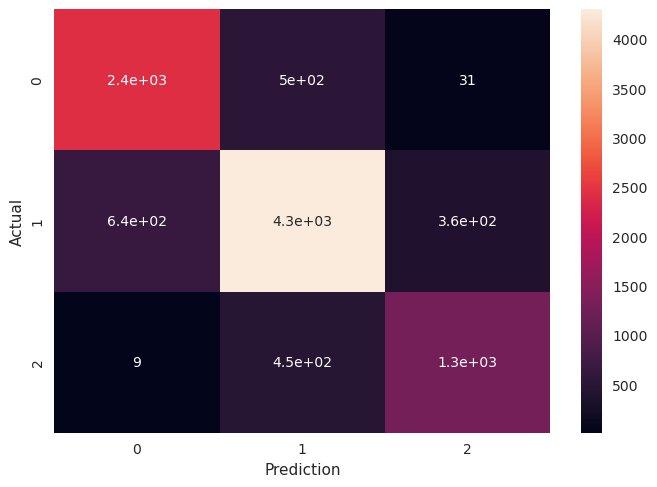

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')
print(classification_report(y_test,y_pred_rf))

### 02. Decision Tree

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      2945
           1       0.74      0.75      0.75      5307
           2       0.66      0.64      0.65      1748

    accuracy                           0.72     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.71      0.72      0.72     10000



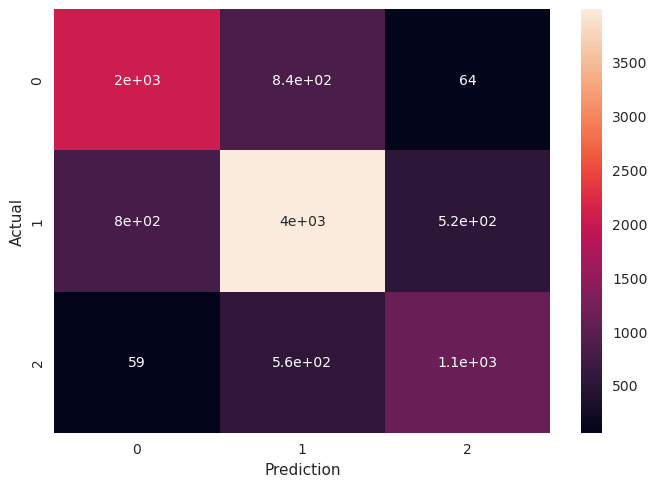

In [45]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')
print(classification_report(y_test,y_pred_dt))

### 03. CatBoost Classifier

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      2945
           1       0.78      0.79      0.78      5307
           2       0.67      0.71      0.69      1748

    accuracy                           0.75     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.76      0.75      0.76     10000



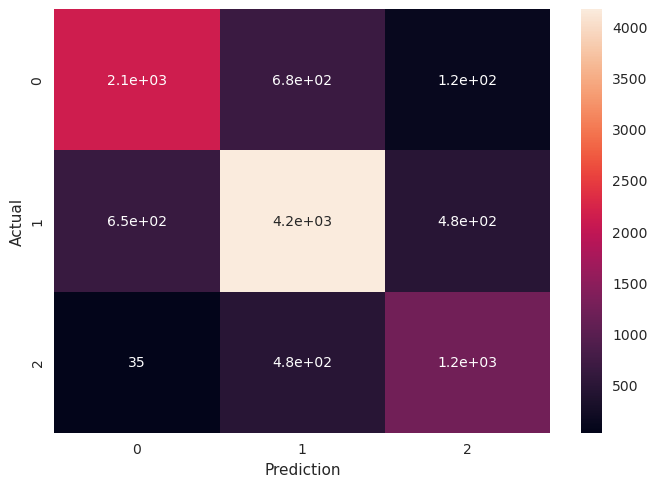

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred_catb), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')
print(classification_report(y_test,y_pred_catb))

### 04. XGBoost Classifier

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2945
           1       0.78      0.78      0.78      5307
           2       0.65      0.70      0.67      1748

    accuracy                           0.74     10000
   macro avg       0.72      0.73      0.73     10000
weighted avg       0.75      0.74      0.74     10000



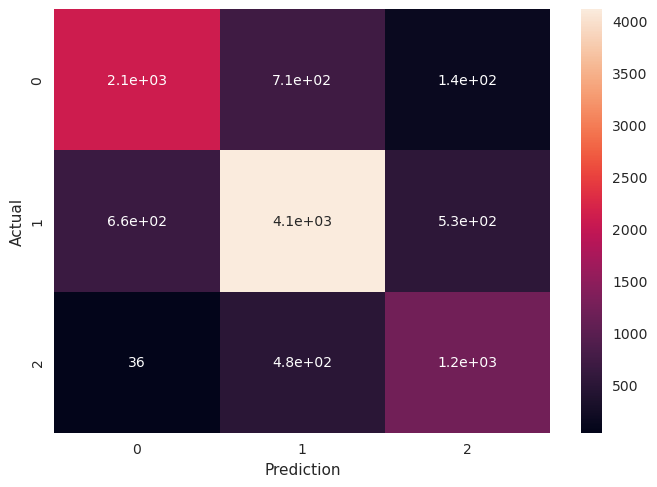

In [47]:
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True)
plt.ylabel('Actual')
plt.xlabel('Prediction')
print(classification_report(y_test,y_pred_xgb))

In [48]:
accuracy, precision, recall, f1 = [],[],[],[]
predictions = [y_pred_rf, y_pred_dt, y_pred_catb,y_pred_xgb]

for pred in predictions:
    accuracy.append(accuracy_score(y_test, pred,)*100)
    precision.append(precision_score(y_test, pred, average='macro')*100)
    recall.append(recall_score(y_test, pred, average='macro')*100)
    f1.append(f1_score(y_test, pred, average='macro')*100)
    
compare = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision,'Recall': recall, 'F1_Score': f1}, 
                        index=['Random Forest','Decision Tree','CatBoost','XGBoost'])### Classification Report
compare.sort_values('Accuracy', ascending=False)

,Accuracy,Precision,Recall,F1_Score
Random Forest,80.02,79.057874,78.877791,78.948419
CatBoost,75.48,73.668194,74.018887,73.816591
XGBoost,74.43,72.451066,73.040456,72.691684
Decision Tree,71.53,70.052907,69.601825,69.821885


## Determined that Random Forest Has the Best Score